In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')

In [3]:
url = 'https://raw.githubusercontent.com/Mahesh-Gugulothu/Water-Quality-classification/refs/heads/main/water_potability.csv'
data = pd.read_csv(url)
print(data.head())


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
columns_name = data.columns
for index, col_name in enumerate(columns_name):
    print(index, col_name)

0 ph
1 Hardness
2 Solids
3 Chloramines
4 Sulfate
5 Conductivity
6 Organic_carbon
7 Trihalomethanes
8 Turbidity
9 Potability


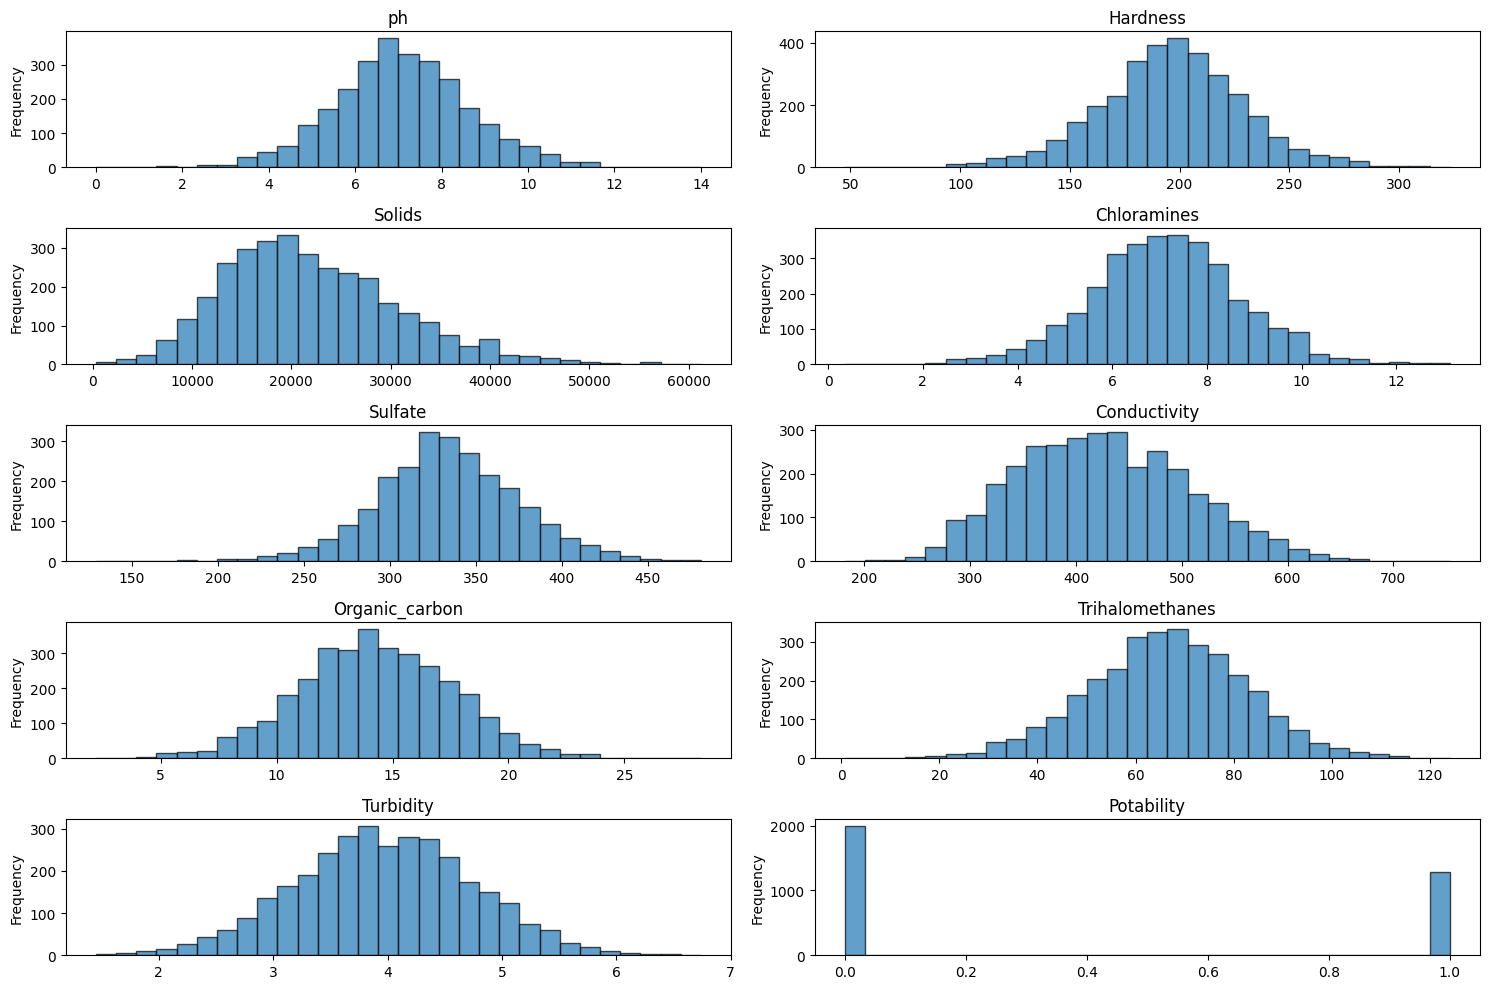

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))

for i, column in enumerate(data.columns):
    plt.subplot(5, 2, i + 1)
    data[column].plot.hist(bins=30, edgecolor='k', alpha=0.7)
    plt.title(column)
plt.tight_layout()

plt.show()

Potability
0    1998
1    1278
Name: count, dtype: int64


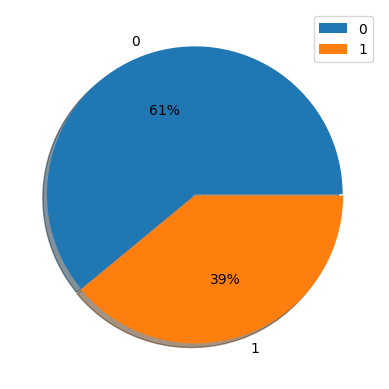

In [8]:
tar = data['Potability'].value_counts()
print(tar)

plt.pie(tar, labels=[0, 1], explode=[0, 0.01], autopct='%.f%%', shadow=True)
plt.legend()
plt.show()

In [9]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
print('Percentage(%) of nulls for each columns : \n')
print((data.isna().sum()/len(data))*100)

Percentage(%) of nulls for each columns : 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [11]:
print("For Potability=1")
data[data.Potability==1][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability=1


ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [12]:
data['ph'] = data['ph'].fillna(value=data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(value=data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median())

In [13]:
data.isna().sum().sum()

np.int64(0)

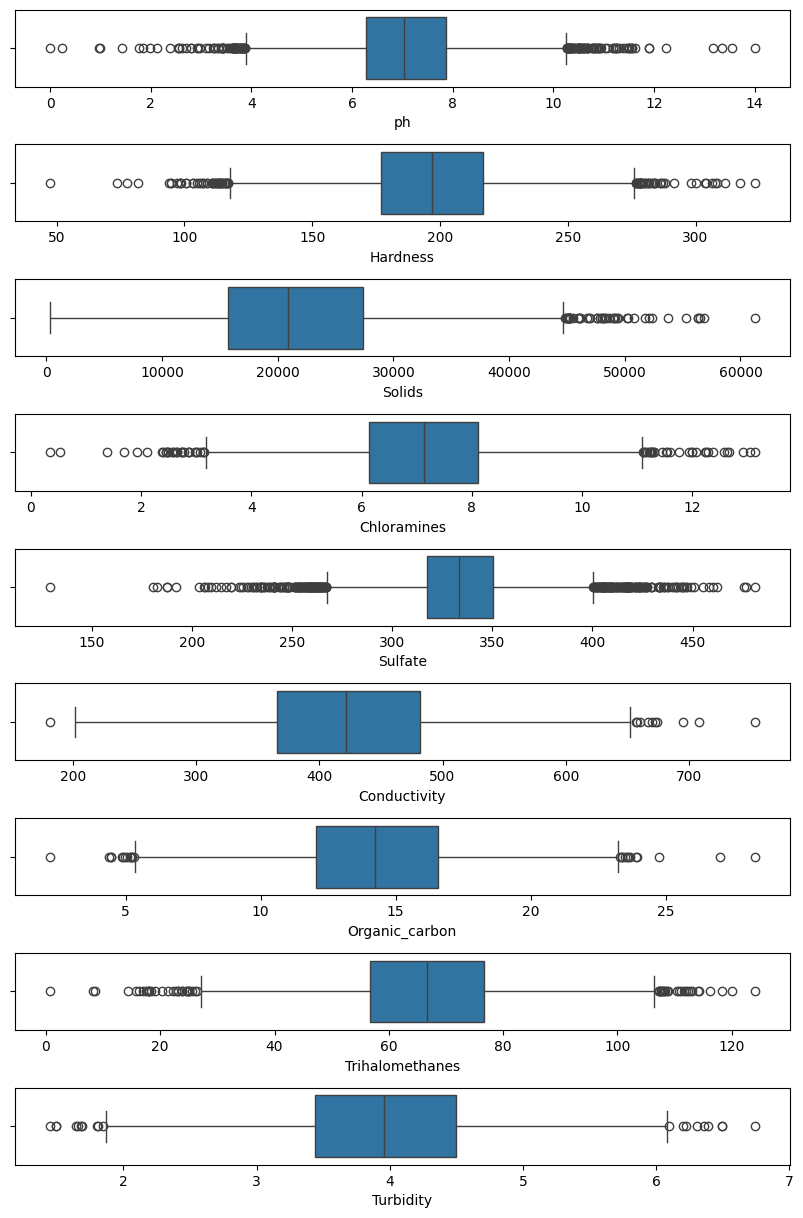

In [14]:
fig, ax = plt.subplots(9, 1, figsize=(10, 15))
fig.subplots_adjust(hspace=0.75)
for i in range(9) :
    sns.boxplot(x=columns_name[i], data=data, ax=ax[i])

In [15]:

def remove_outliers(data, columns):
  for col in columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
  return data

data = remove_outliers(data, columns_name)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0


In [16]:
print(data.shape)

(2657, 10)


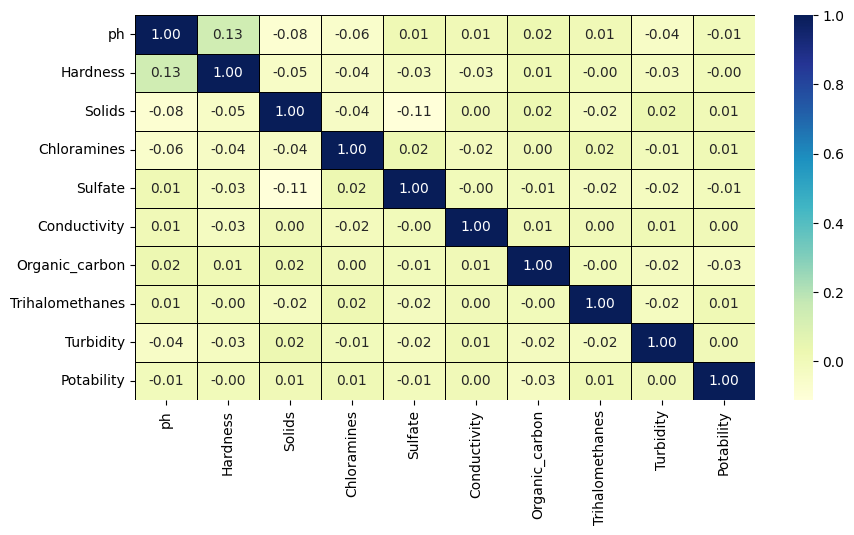

In [17]:
corr = data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='black', cmap='YlGnBu')  # Using 'YlGnBu' color palette
plt.savefig("plots/correlation.png")
plt.show()

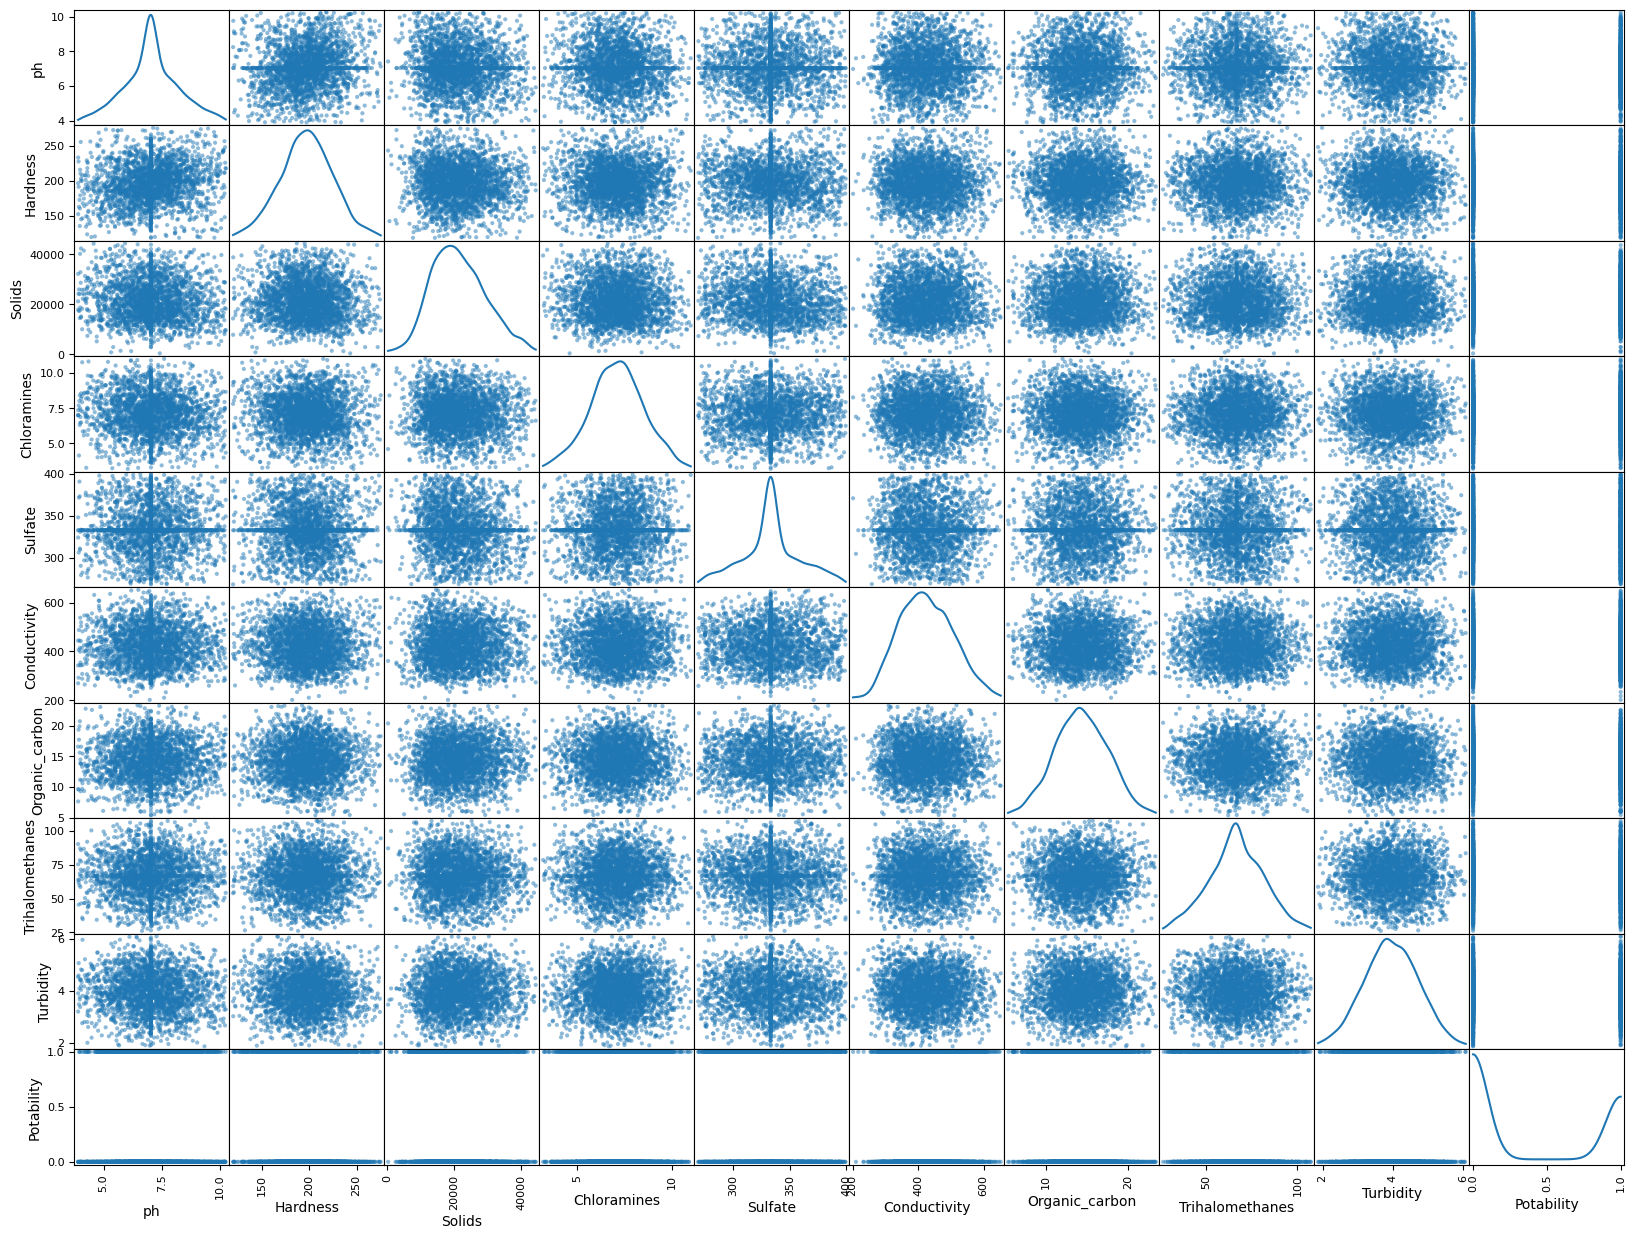

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(20, 15), diagonal='kde')
plt.savefig("plots/scatter.png")
plt.show()


In [19]:
# Define X, y
X = data.drop(columns='Potability')
y = data.Potability

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2657.000000,2657.000000,2657.000000,2657.000000,2657.000000,2657.000000,2657.000000,2657.000000,2657.000000
mean,0.498967,0.497786,0.479956,0.501763,0.496491,0.497027,0.497705,0.497091,0.496233
std,0.191280,0.180397,0.178727,0.180768,0.200551,0.177211,0.179045,0.184519,0.180827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385957,0.382980,0.347115,0.384012,0.390089,0.363718,0.373823,0.379581,0.372080
50%,0.493560,0.501167,0.459728,0.502476,0.491918,0.487008,0.493091,0.498754,0.492630
75%,0.612779,0.616880,0.599458,0.622236,0.605355,0.620288,0.623078,0.622848,0.622619
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=84, test_size=0.2)

In [22]:
lr = LogisticRegression(random_state=84)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print(colored('LogisticRegression Score : {}'.format(lr_score), 'green'))

LogisticRegression Score : 0.609


Confusion matrix:
[[324   0]
 [208   0]]
Classification report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       324
           1       0.00      0.00      0.00       208

    accuracy                           0.61       532
   macro avg       0.30      0.50      0.38       532
weighted avg       0.37      0.61      0.46       532



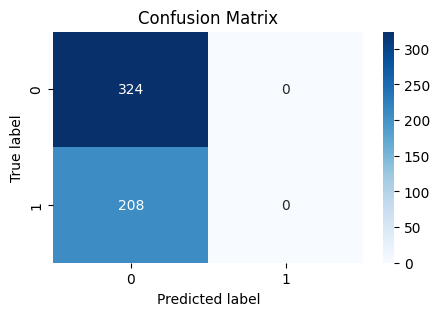

In [23]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


y_pred = lr.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)


os.makedirs("plots", exist_ok=True)


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.savefig("plots/confusion.png")
plt.show()


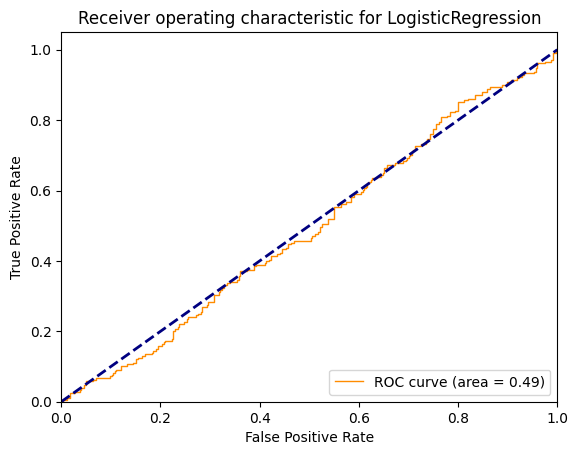

In [24]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Calculate ROC curve and AUC for LogisticRegression
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, preds)
roc_auc_lr = roc_auc_score(y_test, preds)

# Plot ROC curve for LogisticRegression
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for LogisticRegression')
plt.legend(loc="lower right")
plt.savefig("plots/confusion.png")
plt.show()


In [25]:
rf = RandomForestClassifier(random_state=84)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print(colored('RandomForestClassifier Score : {}'.format(rf_score), 'green'))

RandomForestClassifier Score : 0.637


Confusion matrix:
[[283  41]
 [152  56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.87      0.75       324
           1       0.58      0.27      0.37       208

    accuracy                           0.64       532
   macro avg       0.61      0.57      0.56       532
weighted avg       0.62      0.64      0.60       532



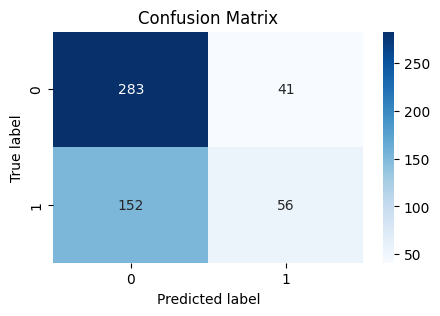

In [26]:
cm = confusion_matrix(y_test, y_pred_rf)

print("Confusion matrix:")
print(cm)

cr = classification_report(y_test, y_pred_rf)

print("Classification Report:")
print(cr)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.savefig("plots/confusion.png")
plt.show()


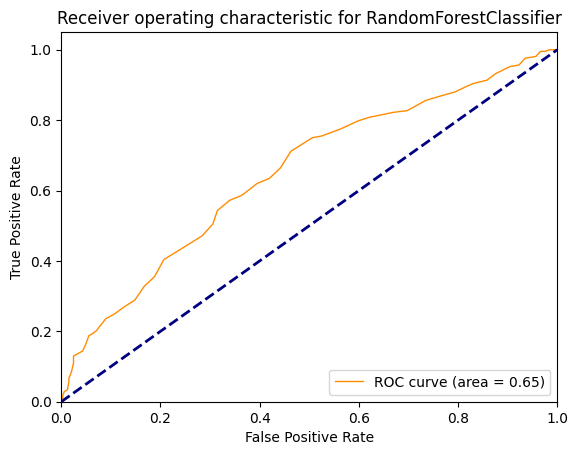

In [27]:
# Calculate ROC curve and AUC for RandomForestClassifier
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, preds)
roc_auc_rf = roc_auc_score(y_test, preds)

# Plot ROC curve for RandomForestClassifier
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for RandomForestClassifier')
plt.legend(loc="lower right")
plt.savefig("plots/confusion.png")
plt.show()


In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print(colored('KNeighborsClassifier Score : {}'.format(knn_score), 'green'))

KNeighborsClassifier Score : 0.562


Confusion matrix:
[[229  95]
 [138  70]]
Classification report:
              precision    recall  f1-score   support

           0       0.62      0.71      0.66       324
           1       0.42      0.34      0.38       208

    accuracy                           0.56       532
   macro avg       0.52      0.52      0.52       532
weighted avg       0.55      0.56      0.55       532



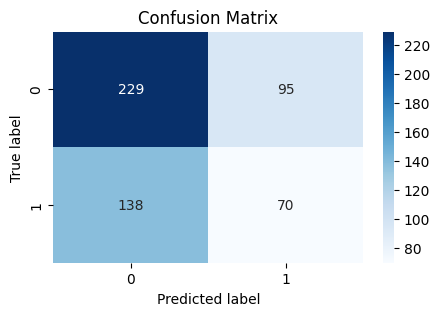

In [29]:
cm = metrics.confusion_matrix(y_test, y_pred_knn)

print("Confusion matrix:")
print(cm)

print("Classification report:")
print(classification_report(y_test, y_pred_knn))

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.savefig("plots/confusion.png")
plt.show()

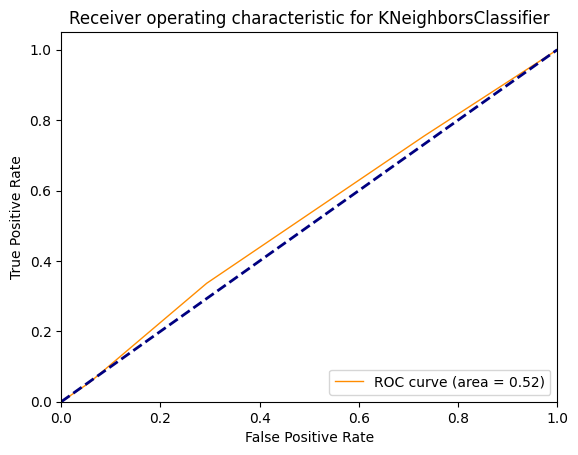

In [30]:
# Calculate ROC curve and AUC for KNeighborsClassifier
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, preds)
roc_auc_knn = roc_auc_score(y_test, preds)

# Plot ROC curve for KNeighborsClassifier
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for KNeighborsClassifier')
plt.legend(loc="lower right")
plt.show()


In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=84)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_score = round(dt.score(X_test, y_test), 3)
print(colored('DecisionTreeClassifier Score : {}'.format(dt_score), 'green'))

DecisionTreeClassifier Score : 0.585


Confusion matrix:
[[214 110]
 [111  97]]
Classification report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       324
           1       0.47      0.47      0.47       208

    accuracy                           0.58       532
   macro avg       0.56      0.56      0.56       532
weighted avg       0.58      0.58      0.58       532



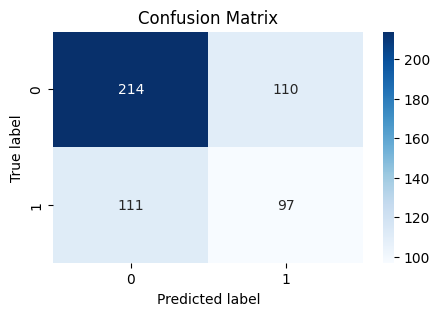

In [32]:
cm = metrics.confusion_matrix(y_test, y_pred_dt)

print("Confusion matrix:")
print(cm)

print("Classification report:")
print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.savefig("plots/confusion.png")
plt.show()

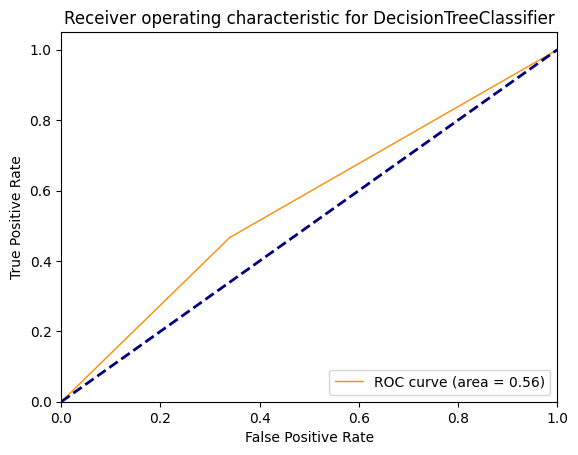

In [33]:
# Calculate ROC curve and AUC for DecisionTreeClassifier
probs = dt.predict_proba(X_test)
preds = probs[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, preds)
roc_auc_dt = roc_auc_score(y_test, preds)

# Plot ROC curve for DecisionTreeClassifier
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for DecisionTreeClassifier')
plt.legend(loc="lower right")
plt.savefig("plots/confusion.png")
plt.show()


In [34]:
result = pd.DataFrame({
    'Model' : [ 'LogisticRegression','RandomForestClassifier', 'KNeighborsClassifier','DecisionTreeClassifier'],
    'Score' : [ lr_score,rf_score,  knn_score,dt_score]
})

result.style.background_gradient()

,Model,Score
0,LogisticRegression,0.609000
1,RandomForestClassifier,0.637000
2,KNeighborsClassifier,0.562000
3,DecisionTreeClassifier,0.585000


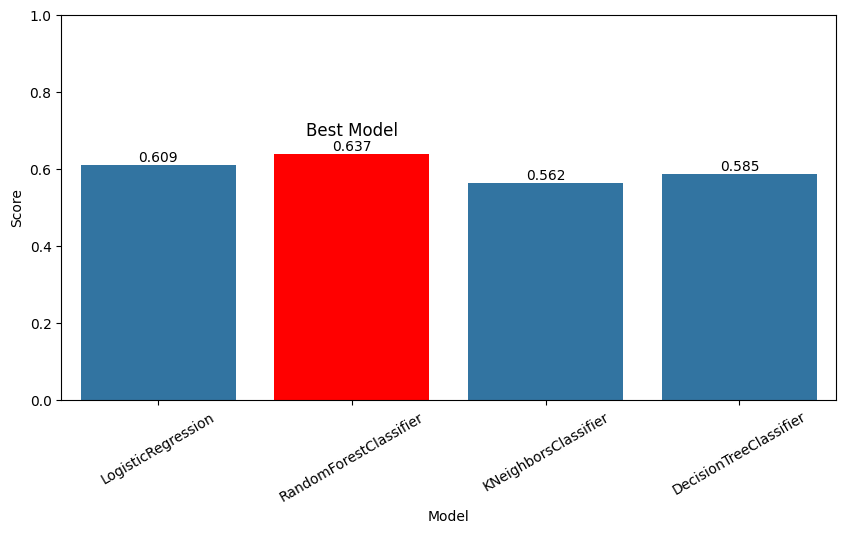

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.barplot(x='Model', y='Score', data=result, ax=ax)

max_score = result['Score'].max()
max_index = result['Score'].idxmax()
ax.patches[max_index].set_facecolor('red')

for i in range(len(result)):
    if i == max_index:
        ax.text(i, result.loc[i, 'Score'] + 0.01, '{:.3f}'.format(result.loc[i, 'Score']), ha='center', color='black')
    else:
        ax.text(i, result.loc[i, 'Score'] + 0.01, '{:.3f}'.format(result.loc[i, 'Score']), ha='center', color='black')

ax.text(max_index, max_score + 0.05, "Best Model", ha='center', fontsize=12, color='black')

ax.set_xticklabels(labels=result['Model'], rotation=30)
ax.set_ylim(0, 1)
plt.savefig("plots/bar.png")
plt.show()


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from termcolor import colored  

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(colored('Best parameters:', 'green'))
print(best_params)

# Get best model
best_model = grid_search.best_estimator_
best_model_score = round(best_model.score(X_test, y_test), 3)

print(colored('Best model score:', 'green'))
print(best_model_score)


Best parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best model score:
0.645


Confusion matrix:
[[290  34]
 [155  53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.90      0.75       324
           1       0.61      0.25      0.36       208

    accuracy                           0.64       532
   macro avg       0.63      0.57      0.56       532
weighted avg       0.64      0.64      0.60       532



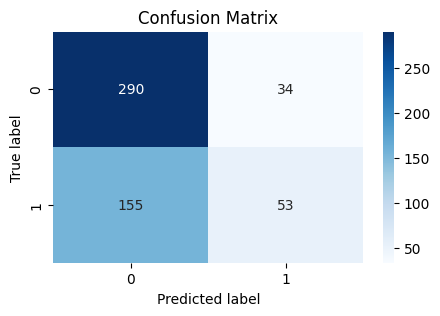

In [38]:
import matplotlib.pyplot as plt
y_pred_rf = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)

print("Confusion matrix:")
print(cm)

cr = classification_report(y_test, y_pred_rf)

print("Classification Report:")
print(cr)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.savefig("plots/confusion.png")
plt.show()


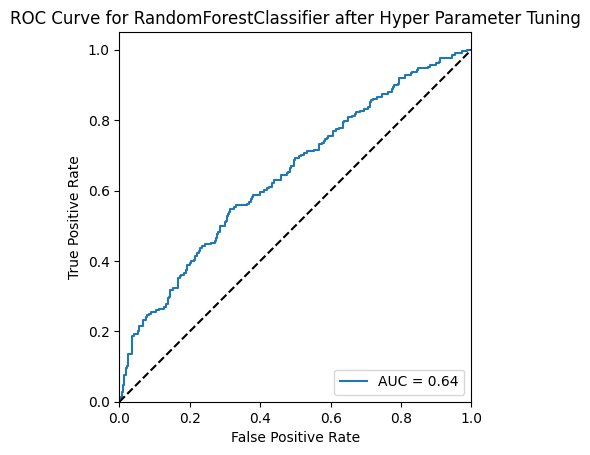

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

ptest = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ptest)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier after Hyper Parameter Tuning')
plt.legend(loc='lower right')
plt.savefig("plots/roc.png")
plt.show()
